#  Lloyd's Algorithm

References:
 1. https://github.com/mapsense/bounded-voronoi-demo/blob/master/voronoi.py
 2. https://en.wikipedia.org/wiki/Lloyd's_algorithm

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from scipy.spatial import voronoi_plot_2d

from system_identification.utils.lloyds_algorithm import LloydsAlgorithm

In [3]:
field = LloydsAlgorithm(
    n=101,
    bounding_box=(-1, 1, -3, 5),
)

In [4]:
def plot_field(field):
    plt.figure()
    plt.plot(*field.bounding_box.exterior.xy, ":")

    for region in field.regions:
        plt.plot(*region.exterior.xy)
        plt.plot(*region.centroid.xy, "o")
        
    for point in field.points:
        plt.plot(*point.xy, "x")
    
    plt.gca().set_aspect("equal")
    
    len(field.regions)

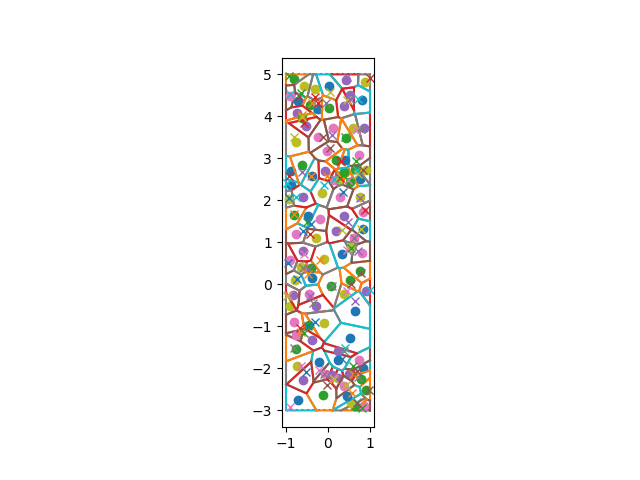

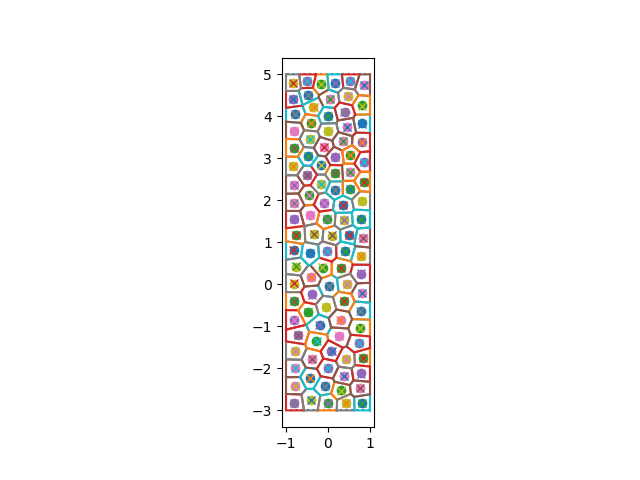

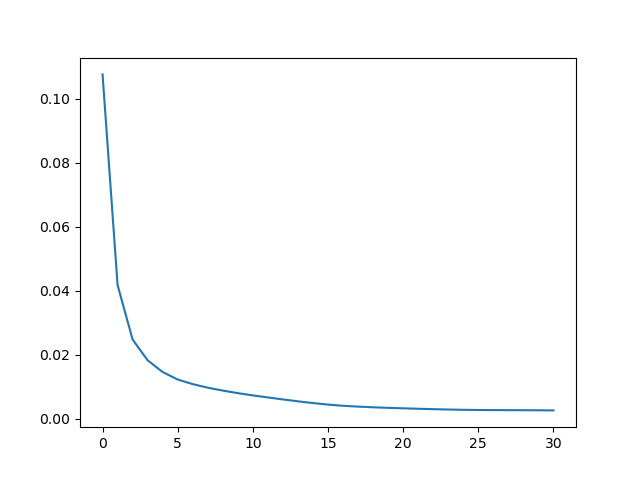

In [5]:
plt.close('all')
errors = [field.error]
plot_field(field)
for _ in range(30):
    field.relax_points(1)
    errors.append(field.error)
plot_field(field)
plt.figure()
plt.plot(errors)